In [4]:
import pandas as pd

df = pd.read_csv('/content/data.csv')

In [6]:
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [9]:
# Summary statistics
print("Descriptive Statistics:\n", df.describe())



Descriptive Statistics:
           youtube    facebook   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   176.451000   27.916800   36.664800   16.827000
std    103.025084   17.816171   26.134345    6.260948
min      0.840000    0.000000    0.360000    1.920000
25%     89.250000   11.970000   15.300000   12.450000
50%    179.700000   27.480000   30.900000   15.480000
75%    262.590000   43.830000   54.120000   20.880000
max    355.680000   59.520000  136.800000   32.400000


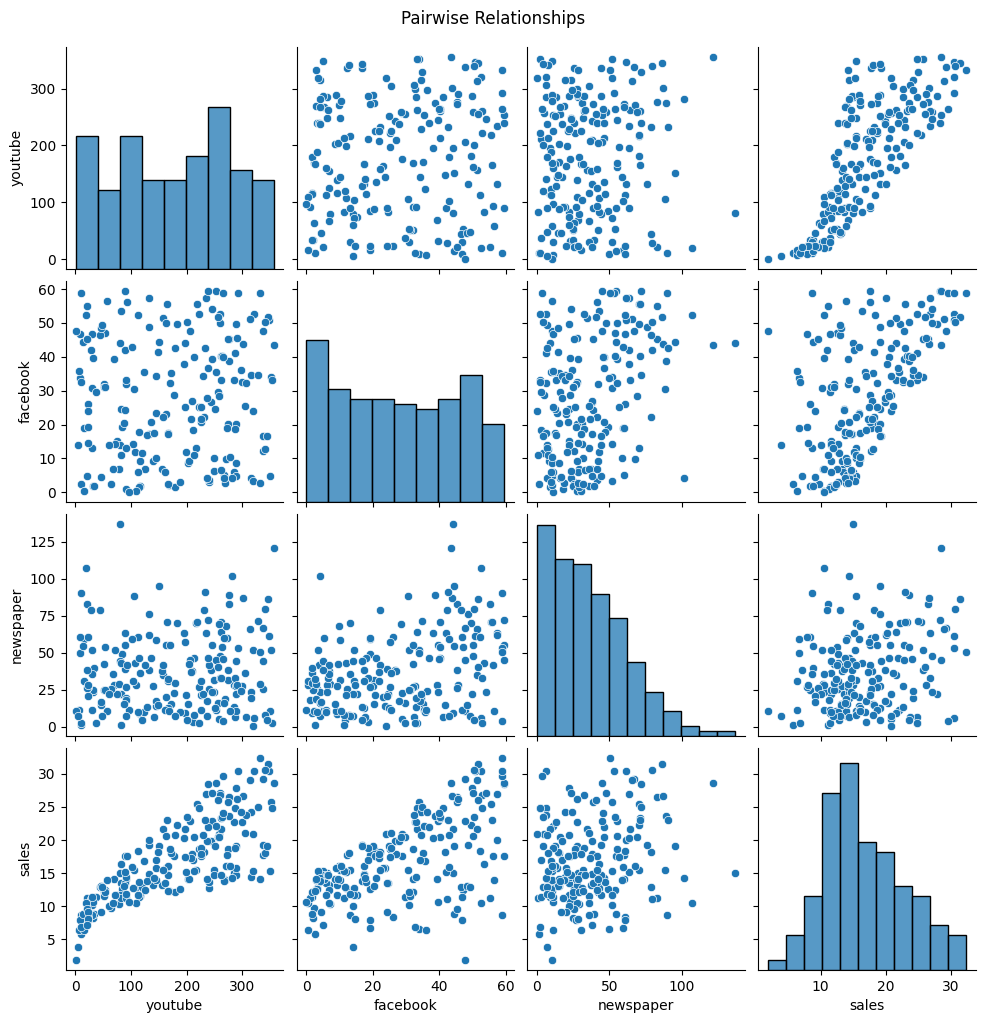

In [10]:
# Pairwise relationships
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [11]:
# Correlation matrix
print("\nCorrelation Matrix:\n", df.corr())


Correlation Matrix:
             youtube  facebook  newspaper     sales
youtube    1.000000  0.054809   0.056648  0.782224
facebook   0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [13]:
print(df.columns)

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')


In [15]:
# Define predictors and response
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Model summary
print("Regression Model Summary:\n")
print(model.summary())

Regression Model Summary:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.58e-96
Time:                        06:15:00   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267    

### Model Interpretation

The multiple linear regression model was developed to analyze the impact of advertising budgets on product sales. The regression equation is:

$$
\text{Sales} = 3.527 + 0.0458 \cdot \text{YouTube} + 0.1885 \cdot \text{Facebook} - 0.0010 \cdot \text{Newspaper}
$$

In this equation, the intercept of 3.527 indicates that if no money is spent on any platform, the expected sales would be approximately 3.527 thousand units. While this value is not meaningful in practice, it serves as a baseline in the regression model.

The coefficient for **YouTube** is 0.0458, meaning that for every additional \$1,000 spent on YouTube advertising, sales are expected to increase by approximately **45.8 units**, holding all other variables constant. Similarly, the coefficient for **Facebook** is 0.1885, indicating that an additional \$1,000 spent on Facebook leads to an estimated increase of **188.5 units** in sales. Both of these variables are statistically significant, with p-values less than 0.001, suggesting strong evidence that they influence sales.

On the other hand, the coefficient for **Newspaper** advertising is –0.0010. This indicates a very small and slightly negative relationship between newspaper advertising and sales. However, the p-value for this predictor is 0.860, which is far above the standard significance level (0.05), suggesting that newspaper advertising does **not** have a statistically significant effect on sales in this dataset.

The model has a high **R-squared value of 0.897**, meaning that approximately 89.7% of the variability in sales is explained by the advertising budgets. The **adjusted R-squared value of 0.896** confirms that the model fits the data very well without overfitting.

Diagnostic plots (such as the residuals vs. fitted values plot and the Q-Q plot) can be used to assess the assumptions of linear regression, including linearity, homoscedasticity, and normality of residuals. Assuming these assumptions are reasonably met and multicollinearity is not a concern (as verified through VIF values), the model can be considered reliable for interpretation and prediction.

---

### Conclusion & Recommendations

The analysis shows that both **YouTube** and **Facebook** advertising have a significant and positive impact on product sales. Among them, **Facebook** has the strongest effect per dollar spent. In contrast, **newspaper advertising** does not appear to significantly influence sales and may not be cost-effective based on the current data.

Therefore, it is recommended that the company **increases budget allocations for YouTube and Facebook** campaigns to boost sales, while carefully **reducing or reevaluating spending on newspaper ads**. Further testing or data collection over time may help refine these insights and guide advertising strategy more effectively.

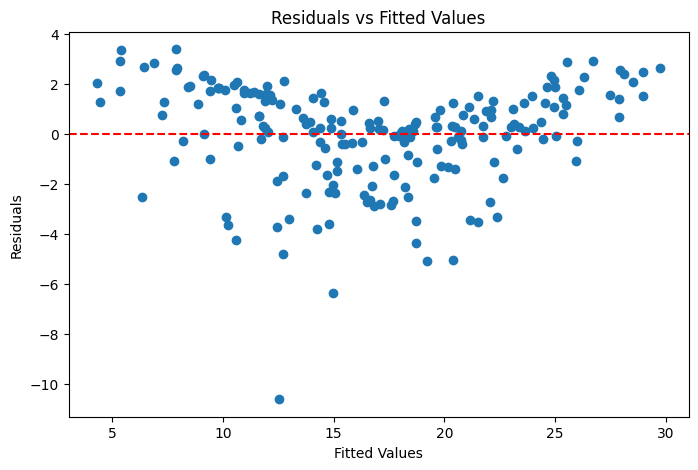

In [17]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

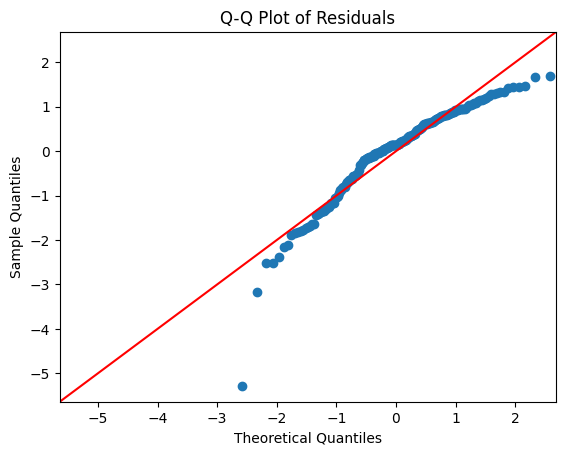

In [18]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [19]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
     Feature       VIF
0      const  6.848900
1    youtube  1.004611
2   facebook  1.144952
3  newspaper  1.145187


In [20]:
# Predict sales given budget inputs
new_data = pd.DataFrame({'const': 1, 'YouTube': [50], 'Facebook': [30], 'Newspaper': [20]})
predicted_sales = model.predict(new_data)[0]
print(f"Predicted Sales: {predicted_sales:.2f} thousand units")

Predicted Sales: 11.45 thousand units


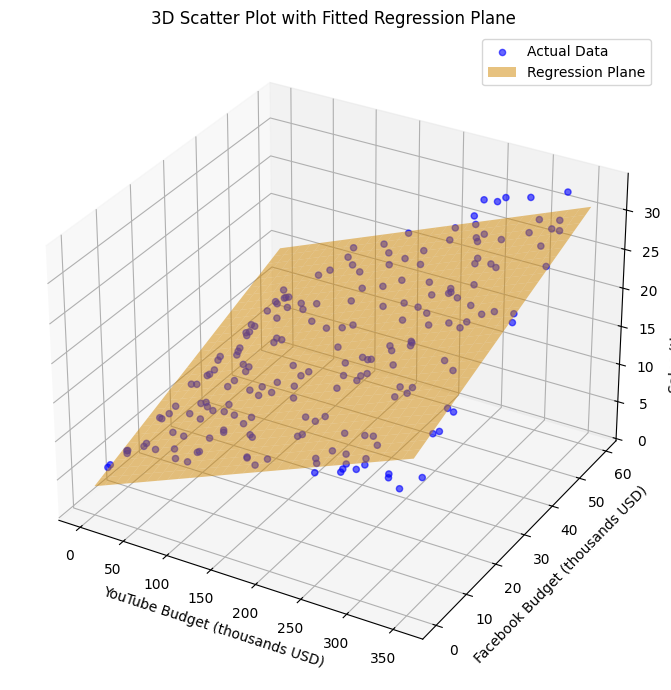

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Select two most impactful predictors (YouTube and Facebook)
x1_range = np.linspace(df['youtube'].min(), df['youtube'].max(), 30)
x2_range = np.linspace(df['facebook'].min(), df['facebook'].max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Prepare grid for prediction
grid_df = pd.DataFrame({
    'const': 1,
    'youtube': x1_grid.ravel(),
    'facebook': x2_grid.ravel(),
    'newspaper': df['newspaper'].mean()  # keep newspaper fixed at average value
})

# Predict sales
z_pred = model.predict(grid_df).values.reshape(x1_grid.shape)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual data points
ax.scatter(df['youtube'], df['facebook'], df['sales'], c='blue', label='Actual Data', alpha=0.6)

# Regression plane
ax.plot_surface(x1_grid, x2_grid, z_pred, color='orange', alpha=0.5, label='Regression Plane')

# Labels and title
ax.set_xlabel('YouTube Budget (thousands USD)')
ax.set_ylabel('Facebook Budget (thousands USD)')
ax.set_zlabel('Sales (thousands of units)')
ax.set_title('3D Scatter Plot with Fitted Regression Plane')

plt.legend()
plt.tight_layout()
plt.show()